In [1]:
#import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
#Read input dataset
col_names = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]
df = pd.read_table("iris.data", header=None, delimiter=",")
df.columns = col_names
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Describe dataset
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


IQR=%.3f for sepal length in cm 1.3000000000000007
IQR=%.3f for sepal width in cm 0.5
IQR=%.3f for petal length in cm 3.4999999999999996
IQR=%.3f for petal width in cm 1.5


C:\Users\esmae\AppData\Local\Temp\ipykernel_57228\510789801.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
C:\Users\esmae\AppData\Local\Temp\ipykernel_57228\510789801.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')


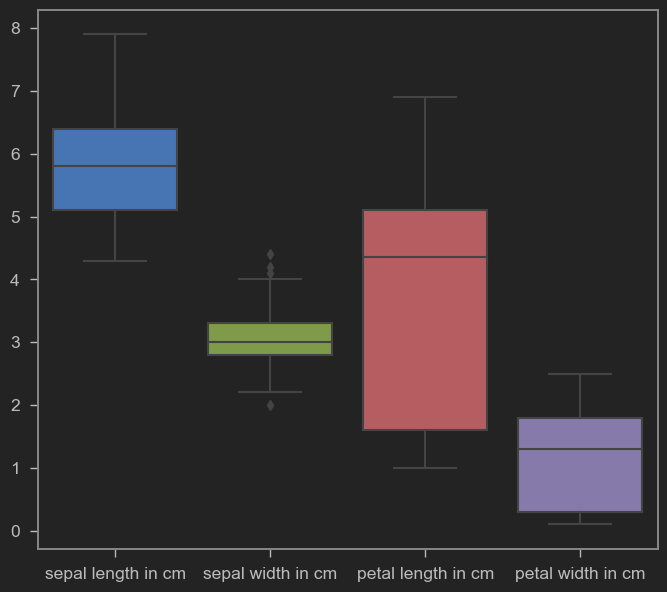

In [5]:
# Check for outliers
columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm']
for col in columns :
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint') 
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint') 
    IQR = Q3 - Q1 
    print(f'IQR=%.3f for {col}', IQR)   

sns.boxplot(data = df)    
plt.show()

In [6]:
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['sepal width in cm'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sepal width in cm'] <= (Q1-1.5*IQR))
  

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (150, 5)
New Shape:  (147, 5)


In [7]:
#check for missing data
df.isna().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [8]:
#drop duplicate data instances if any
df.drop_duplicates(inplace=True)
print(df.shape)

(144, 5)


In [9]:
#find number of unique classes
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.groupby("class").size()

class
Iris-setosa        45
Iris-versicolor    50
Iris-virginica     49
dtype: int64

<AxesSubplot:xlabel='class'>

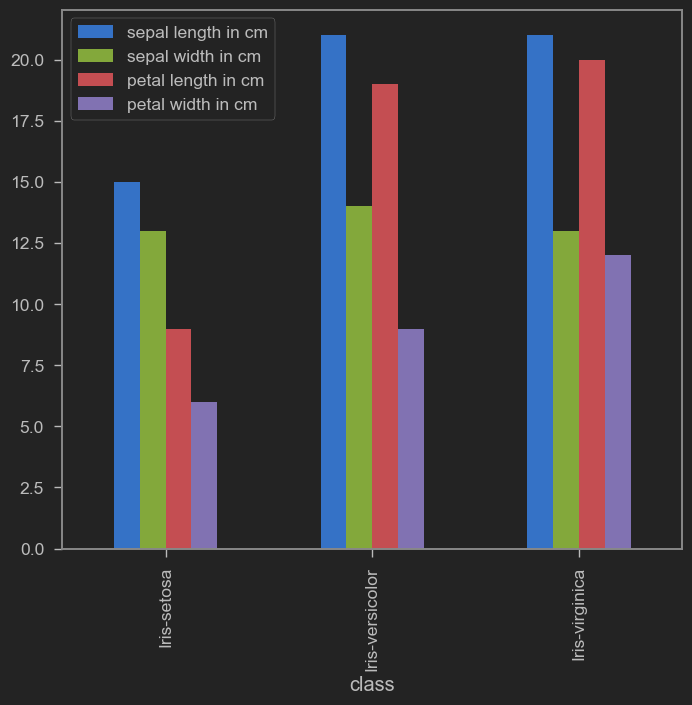

In [11]:
#Check if dataset is balanced
df.groupby(df["class"]).nunique().plot(kind="bar")

C:\Users\esmae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


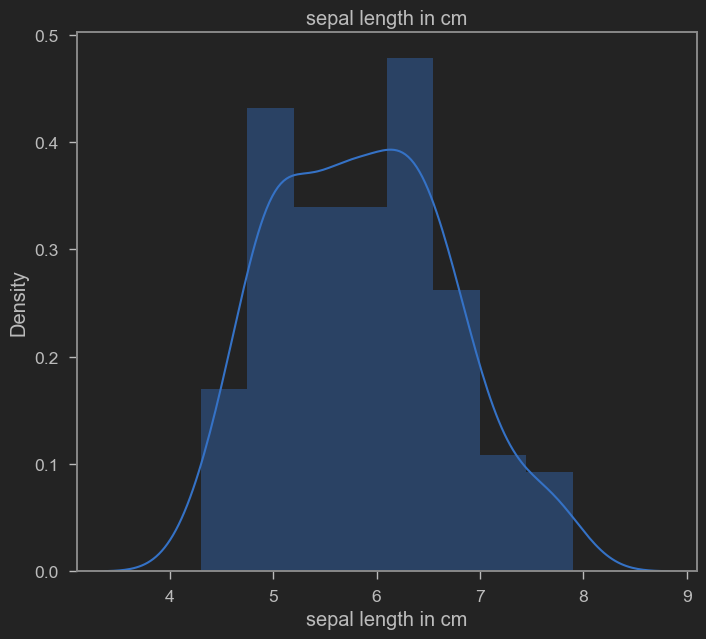

C:\Users\esmae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


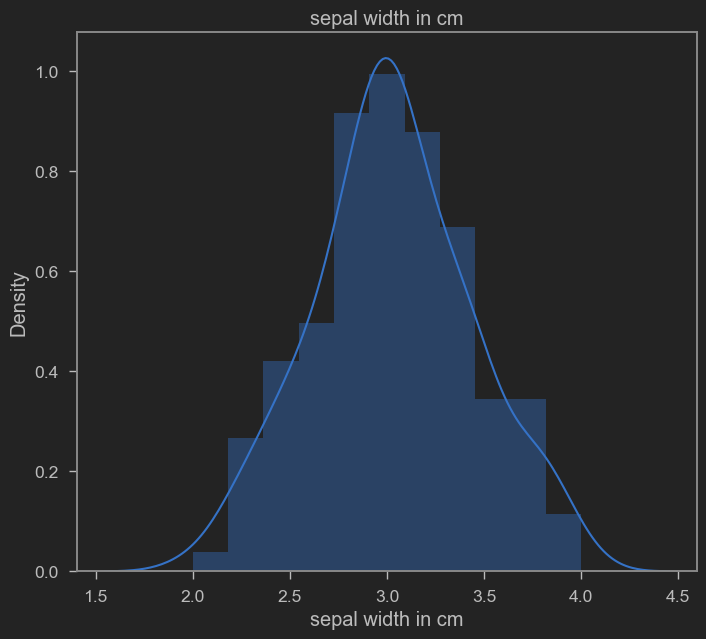

C:\Users\esmae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


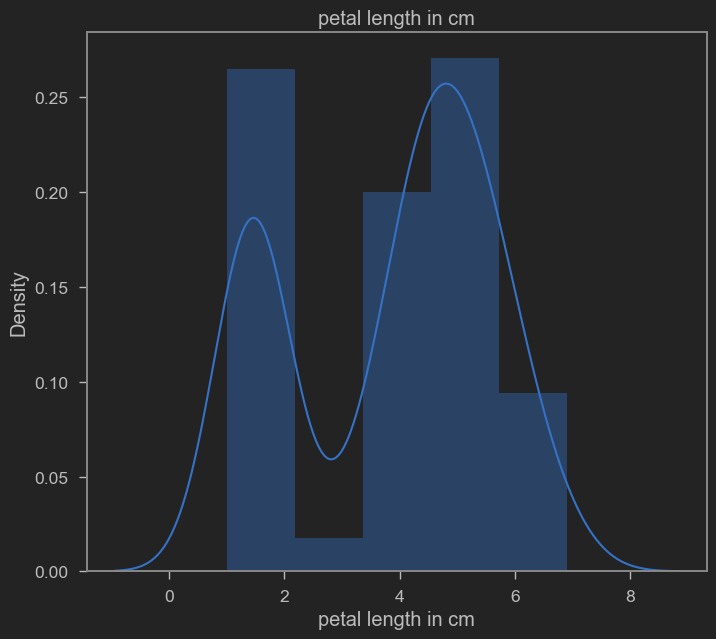

C:\Users\esmae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


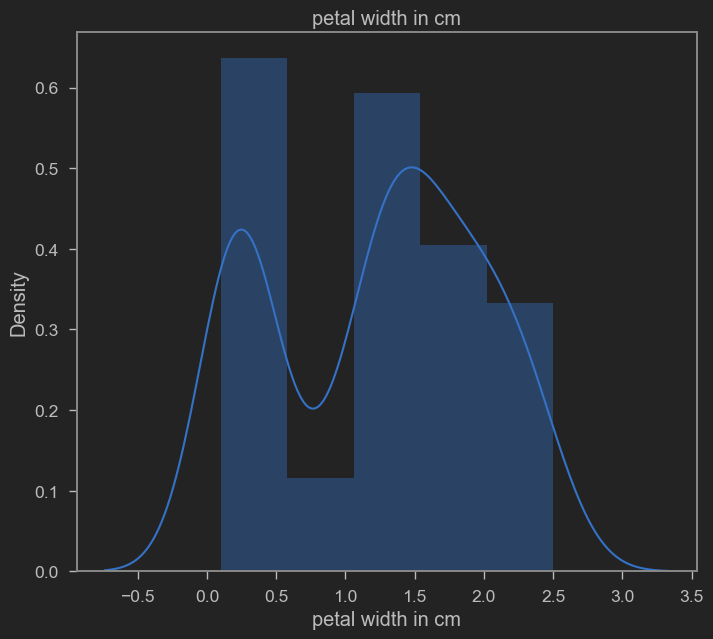

In [12]:
# Visualization visual inspection of dataset
for col in columns:
    sns.distplot(df[col])
    plt.title(col)
    plt.show()

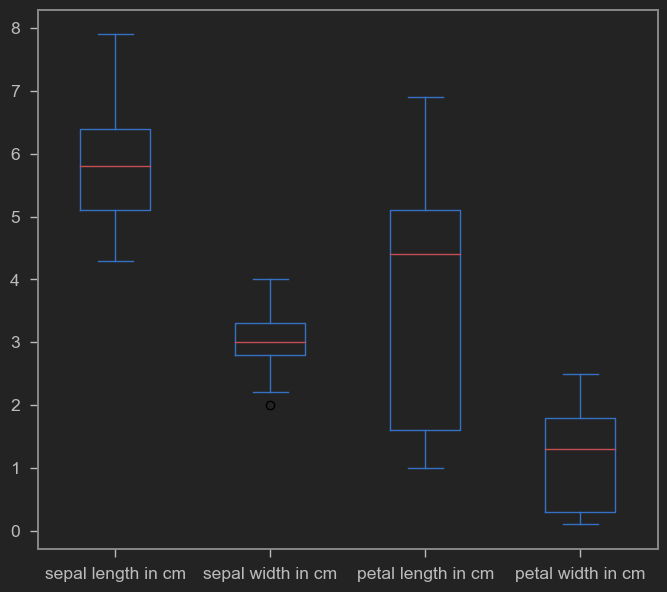

In [13]:
#Box Plot for each input variable
df.plot(kind="box")
plt.show()

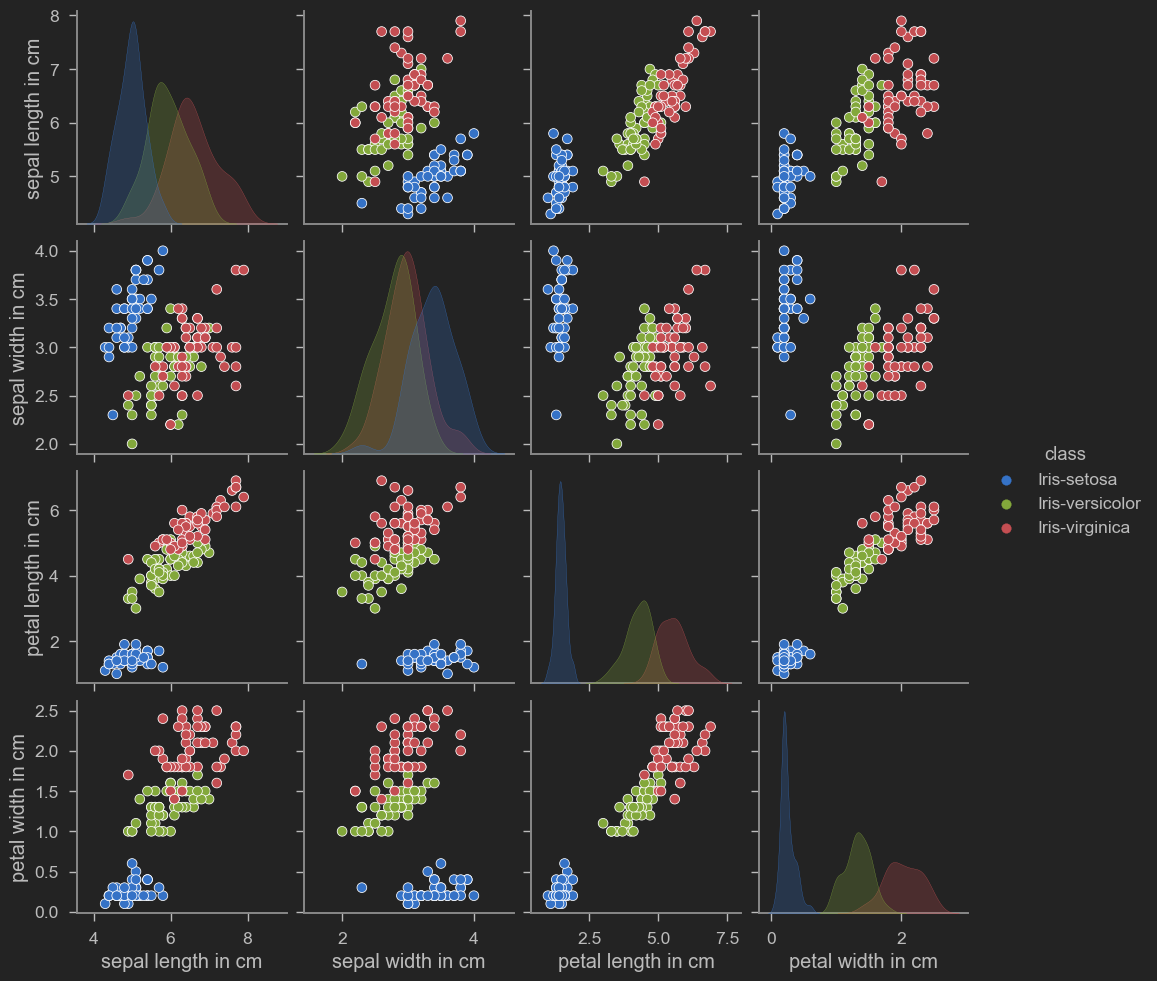

In [14]:
#Histogram Plot for each input variable
sns.pairplot(df , hue="class")
plt.show()

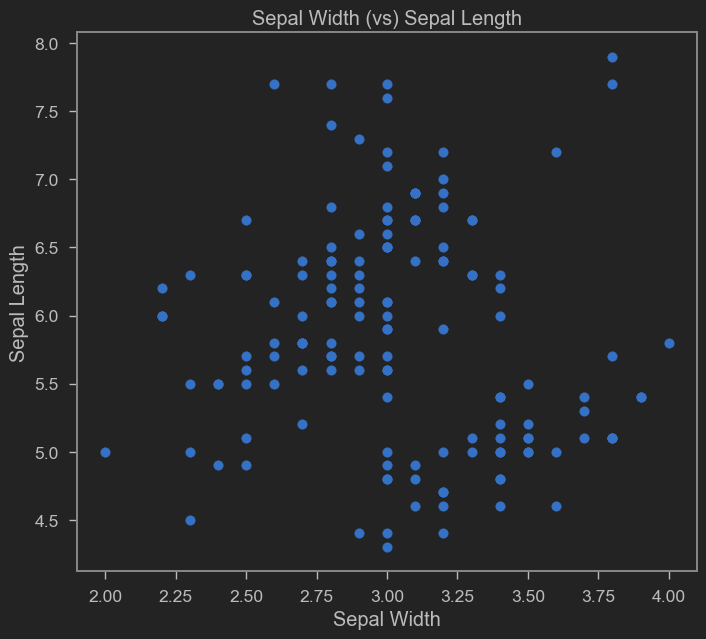

In [15]:
#scatter Plot for two input variables
plt.scatter(df["sepal width in cm"],df["sepal length in cm"])
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title("Sepal Width (vs) Sepal Length")
plt.show()

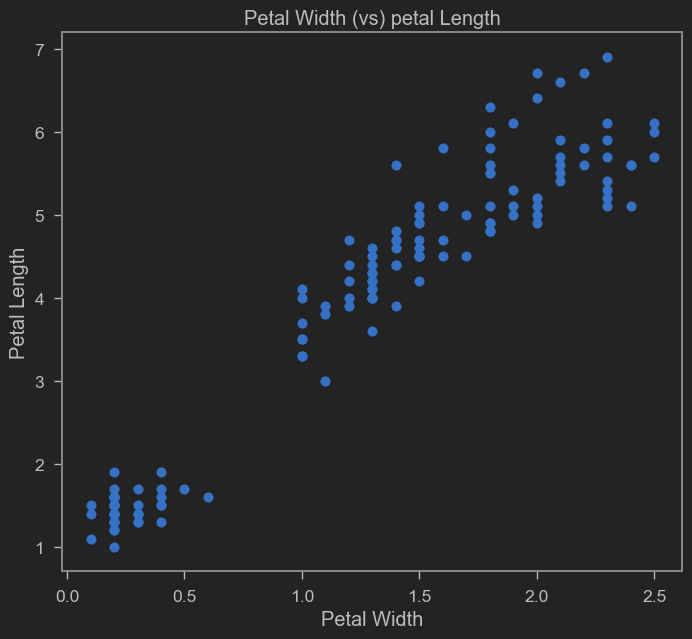

In [16]:
plt.scatter(df["petal width in cm"],df["petal length in cm"])
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.title("Petal Width (vs) petal Length")
plt.show()

In [17]:
#Statistical Summary after cleaning
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,144.000000,144.000000,144.000000,144.000000
mean,5.864583,3.031250,3.828472,1.229167
std,0.835277,0.406153,1.744909,0.752141
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [18]:
X = df[columns]
y = df["class"]

# KNN MODEL

In [19]:
test_list=[0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
K_list = [ 1 , 3 , 5 , 7 , 10 , 20 , 30 , 40 , 50]

In [20]:
def KNN_model(X,y) :
    count = 0
    average_correct_predictions_list , average_score_train_list , average_score_test_list = [] , [] , []
    for test_size in test_list :
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 , test_size=test_size)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        correct_predictions_list , not_correct_predictions_list , score_for_train_list , score_for_test_list   = [] , [] , [] , []
        for i in K_list :
            count+= 1 
            knn = KNeighborsClassifier(n_neighbors = i)
            knn.fit(X_train, y_train)
            train_score = knn.score(X_train, y_train)
            score_for_train_list.append(train_score)
            test_score = knn.score(X_test, y_test)
            score_for_test_list.append(test_score)
            print(f"For The K Equal {i} .. and For The Test Size Equal {test_size} : \n ")
            print('Accuracy of K-NN classifier on training set: {:.2f}'
                 .format(train_score))
            print('Accuracy of K-NN classifier on test set: {:.2f}'
                 .format(test_score))
            prediction = knn.predict(X_test) 
            comparing = (y_test == prediction)
            num_of_correct_predictions = comparing.sum()
            correct_predictions_list.append(num_of_correct_predictions)
            number_of_not_correct_predictions = len(comparing) - comparing.sum()
            not_correct_predictions_list.append(number_of_not_correct_predictions)
            print("Number of the Correct Predictions is :  ",num_of_correct_predictions )
            print("Number of the Incorrect Predictions is :  ",number_of_not_correct_predictions )
            print(f"Iteration Number Equal : {count} \n ")
            print("----------------------------------------------------------------------------------------------\n")
        avg_correct_10_predictions = sum(correct_predictions_list) / len(correct_predictions_list)  
        avg_score_train_10 = sum(score_for_train_list) / len(score_for_train_list)
        avg_score_test_10 = sum(score_for_test_list) / len(score_for_test_list)
        average_correct_predictions_list.append(avg_correct_10_predictions) 
        average_score_train_list.append(avg_score_train_10)
        average_score_test_list.append(avg_score_test_10)  
        print("The Average Number of Correct Predictions is : " , average_correct_predictions_list[-1])
        print("**********************************************************************************************\n")
        plt.plot(K_list , correct_predictions_list)
        plt.plot(K_list,not_correct_predictions_list , color = "red")
        plt.xlabel("Number of the K_Neighbors")
        plt.ylabel("Number of the Correct & Incorrect  predictions")
        plt.title("K_Neighbors (vs) The Correct & Incorrect predictions")
        plt.legend(["Correct predictions","Incorrect predictions"])
        plt.xticks(K_list)
        plt.show()
        print("----------------------------------------------------------------------------------------------")
        plt.plot(K_list , score_for_train_list)
        plt.plot(K_list , score_for_test_list , color = "red")
        plt.xlabel("Number of the K_Neighbors")
        plt.ylabel("Score on Training & Test Set")
        plt.title("K_Neighbors (vs) The Training & Test Set Score") 
        plt.legend(["Training Set","Test Set"])
        plt.xticks(K_list)
        plt.show()
        print("----------------------------------------------------------------------------------------------")  
    plt.plot(K_list , average_correct_predictions_list , color = "yellow")
    plt.xlabel("Number of the K_Neighbors")
    plt.ylabel("The Average of The Correct Predictions")
    plt.title("K_Neighbors (vs) The Average Correct Predictions") 
    plt.xticks(K_list)
    plt.show()
    print("----------------------------------------------------------------------------------------------")  
    plt.plot(K_list , average_score_train_list , color = "green")
    plt.plot(K_list , average_score_test_list , color = "orange")
    plt.xlabel("Number of the K_Neighbors")
    plt.ylabel(" Average Score on Training & Test Set")
    plt.title("K_Neighbors (vs) The Average Training & Test Set Score") 
    plt.legend(["Training Set","Test Set"])
    plt.xticks(K_list)
    plt.show()        

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 1 .. and For The Test Size Equal 0.15 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.91
Number of the Correct Predictions is :   20
Number of the Incorrect Predictions is :   2
Iteration Number Equal : 1 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.15 : 
 
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.91
Number of the Correct Predictions is :   20
Number of the Incorrect Predictions is :   2
Iteration Number Equal : 2 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.15 : 
 
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.91
Number of the Correct Predictions is :   20
Number of the Incorrect Predictions is :   2
Iteration Number

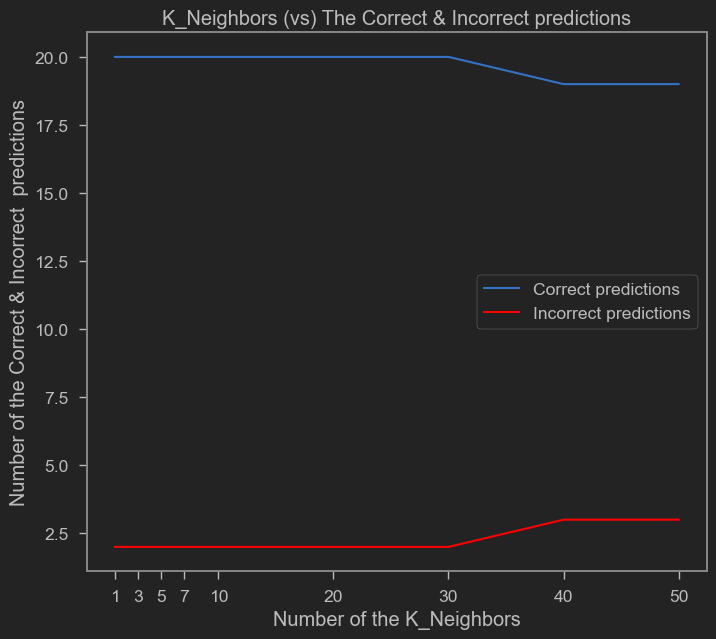

----------------------------------------------------------------------------------------------


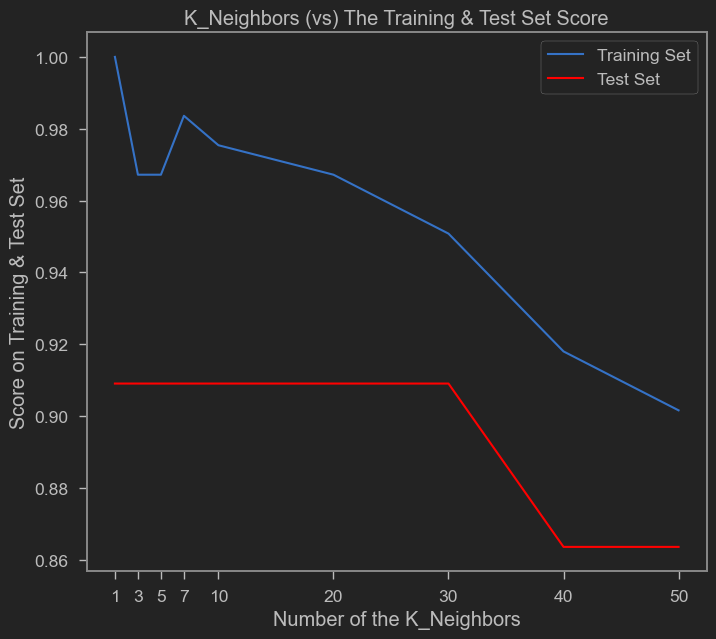

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.2 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.86
Number of the Correct Predictions is :   25
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 10 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.2 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.86
Number of the Correct Predictions is :   25
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 11 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.2 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.86
Number of t

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

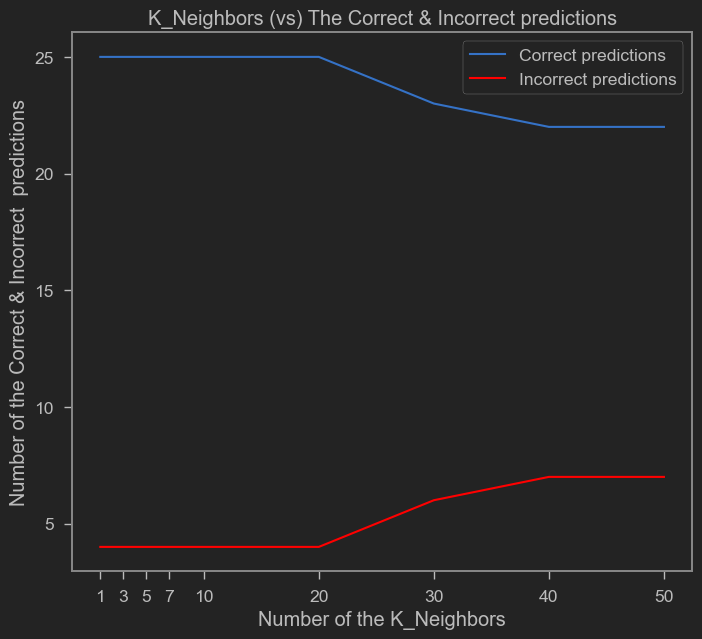

----------------------------------------------------------------------------------------------


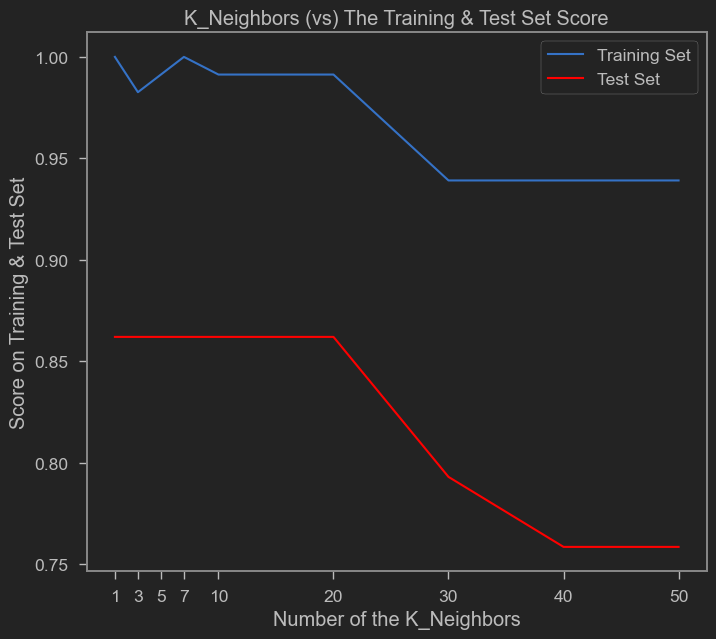

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.25 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.89
Number of the Correct Predictions is :   32
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 19 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.25 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.89
Number of the Correct Predictions is :   32
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 20 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.25 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.89
Number o

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 50 .. and For The Test Size Equal 0.25 : 
 
Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.81
Number of the Correct Predictions is :   29
Number of the Incorrect Predictions is :   7
Iteration Number Equal : 27 
 
----------------------------------------------------------------------------------------------

The Average Number of Correct Predictions is :  31.11111111111111
**********************************************************************************************



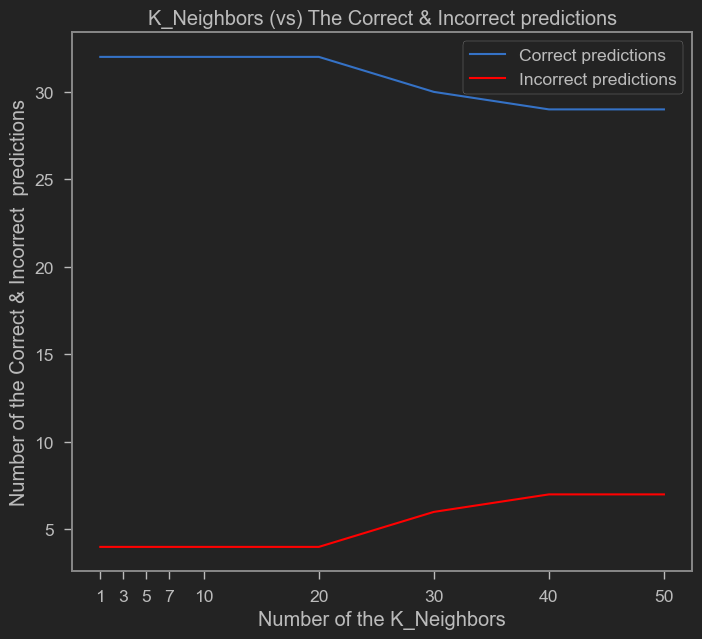

----------------------------------------------------------------------------------------------


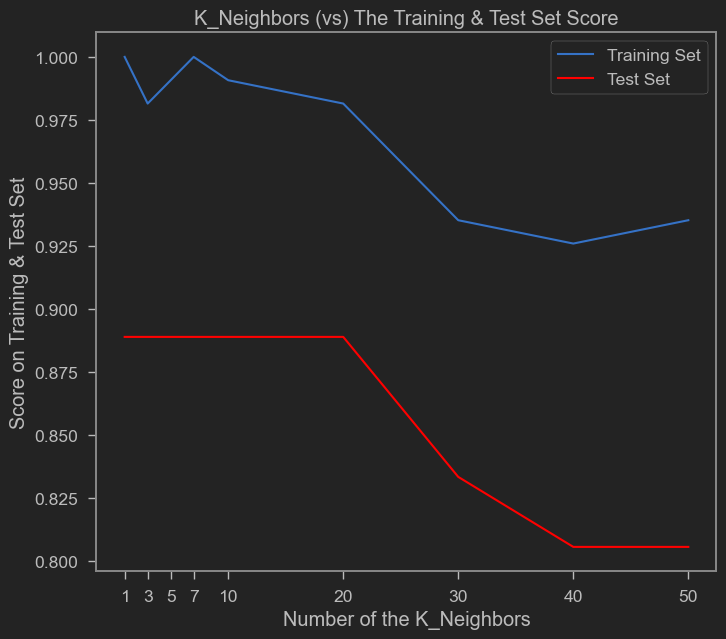

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.3 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.86
Number of the Correct Predictions is :   38
Number of the Incorrect Predictions is :   6
Iteration Number Equal : 28 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.3 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.91
Number of the Correct Predictions is :   40
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 29 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.3 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.91
Number of t

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

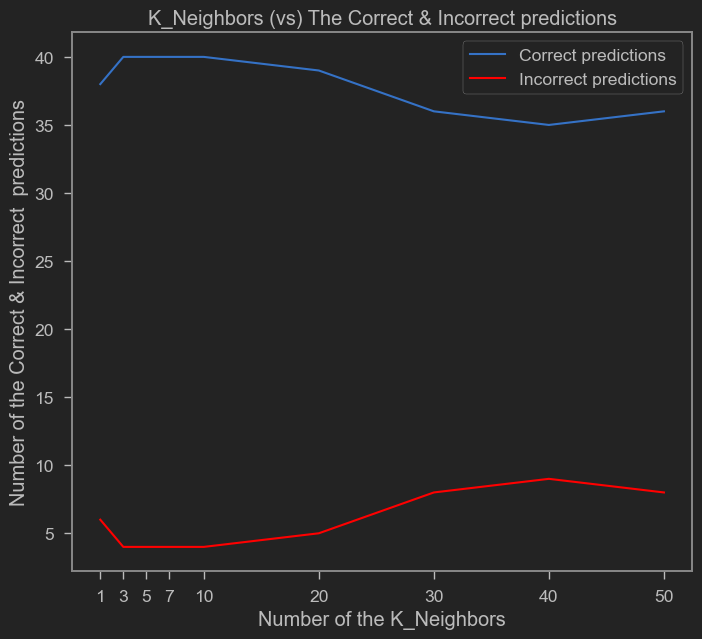

----------------------------------------------------------------------------------------------


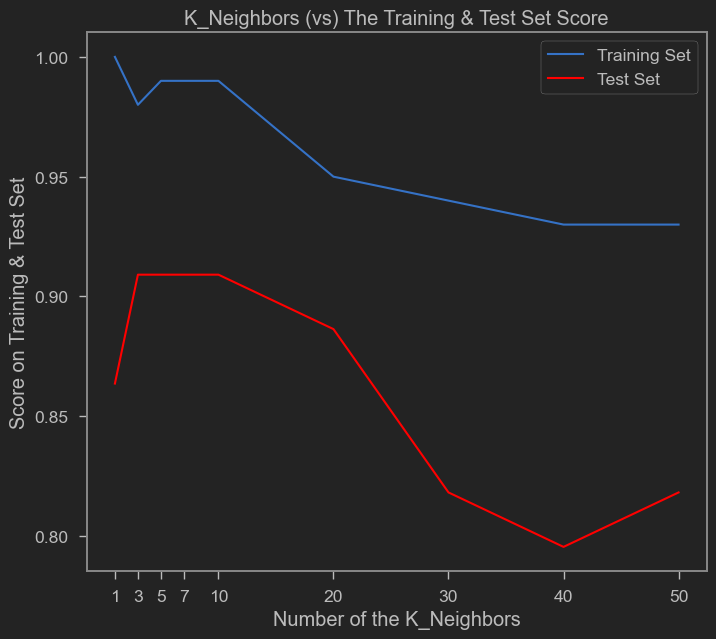

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.35 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.88
Number of the Correct Predictions is :   45
Number of the Incorrect Predictions is :   6
Iteration Number Equal : 37 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.35 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.92
Number of the Correct Predictions is :   47
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 38 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.35 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.92
Number o

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 40 .. and For The Test Size Equal 0.35 : 
 
Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.82
Number of the Correct Predictions is :   42
Number of the Incorrect Predictions is :   9
Iteration Number Equal : 44 
 
----------------------------------------------------------------------------------------------

For The K Equal 50 .. and For The Test Size Equal 0.35 : 
 
Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.82
Number of the Correct Predictions is :   42
Number of the Incorrect Predictions is :   9
Iteration Number Equal : 45 
 
----------------------------------------------------------------------------------------------

The Average Number of Correct Predictions is :  45.0
**********************************************************************************************



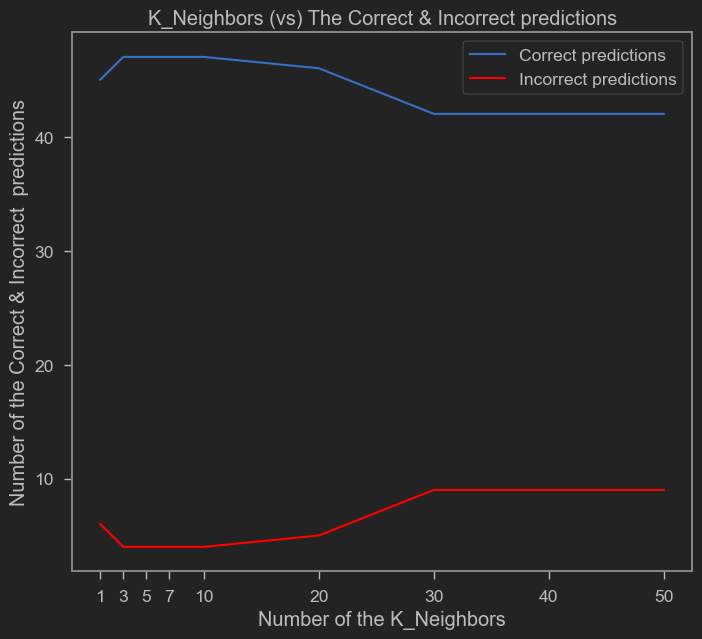

----------------------------------------------------------------------------------------------


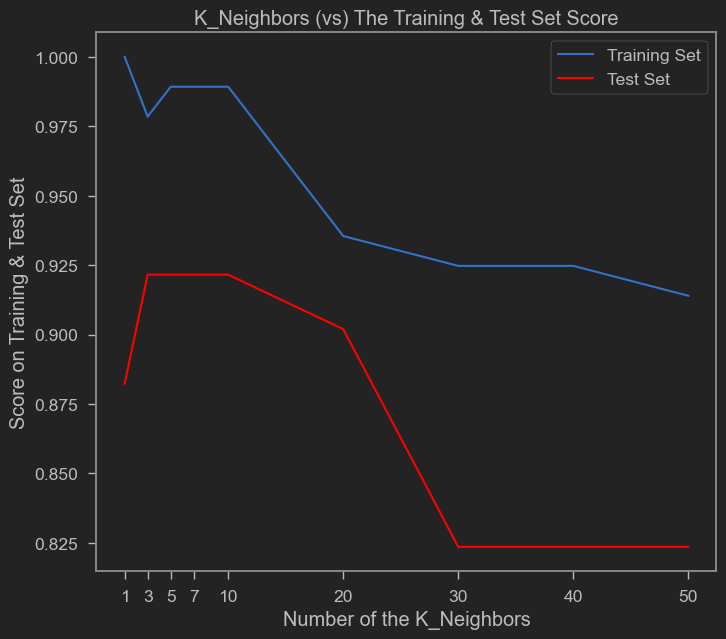

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.4 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.90
Number of the Correct Predictions is :   52
Number of the Incorrect Predictions is :   6
Iteration Number Equal : 46 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.4 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.93
Number of the Correct Predictions is :   54
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 47 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.4 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.93
Number of t

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

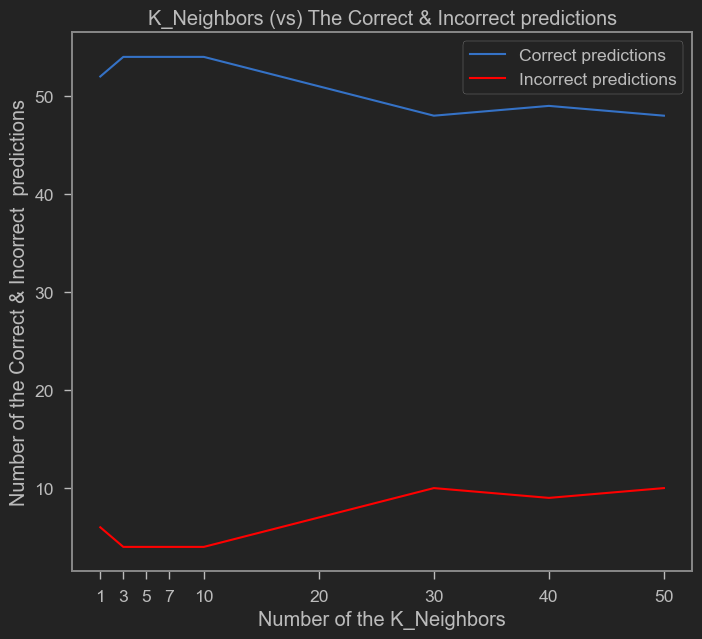

----------------------------------------------------------------------------------------------


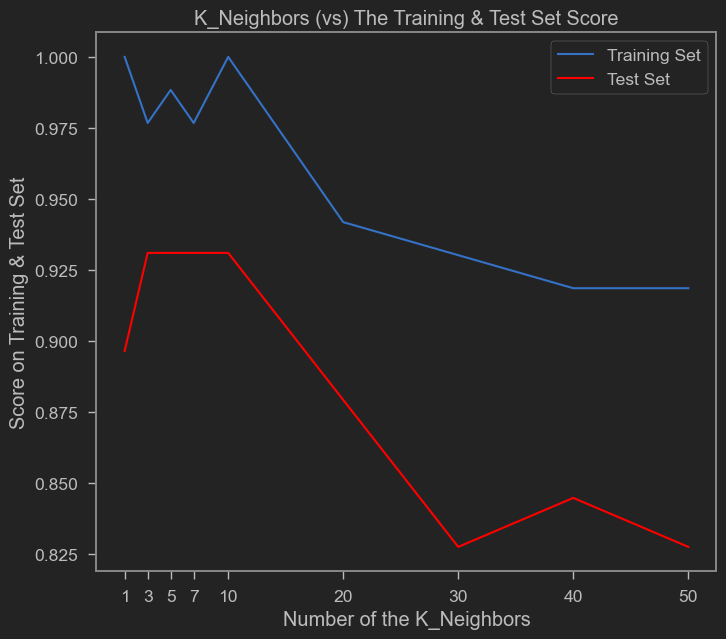

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.45 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.92
Number of the Correct Predictions is :   60
Number of the Incorrect Predictions is :   5
Iteration Number Equal : 55 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.45 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.92
Number of the Correct Predictions is :   60
Number of the Incorrect Predictions is :   5
Iteration Number Equal : 56 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.45 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.92
Number o

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 40 .. and For The Test Size Equal 0.45 : 
 
Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.83
Number of the Correct Predictions is :   54
Number of the Incorrect Predictions is :   11
Iteration Number Equal : 62 
 
----------------------------------------------------------------------------------------------

For The K Equal 50 .. and For The Test Size Equal 0.45 : 
 
Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.62
Number of the Correct Predictions is :   40
Number of the Incorrect Predictions is :   25
Iteration Number Equal : 63 
 
----------------------------------------------------------------------------------------------

The Average Number of Correct Predictions is :  56.44444444444444
**********************************************************************************************



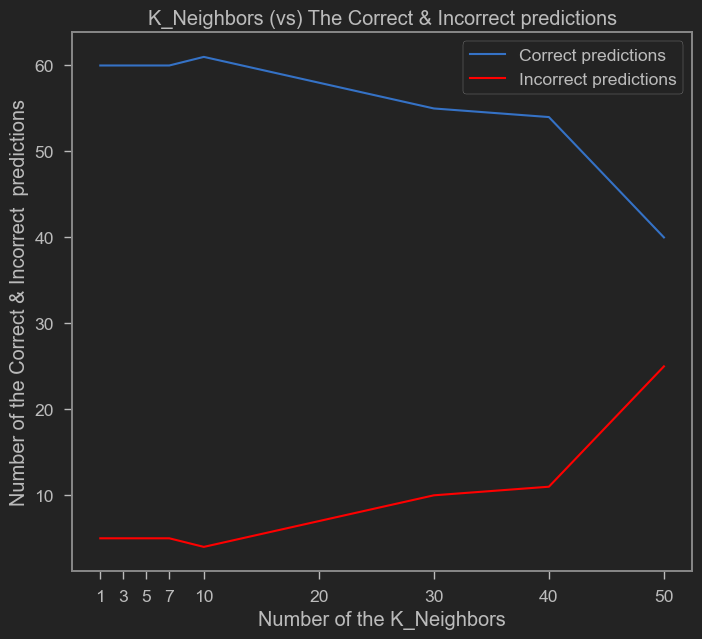

----------------------------------------------------------------------------------------------


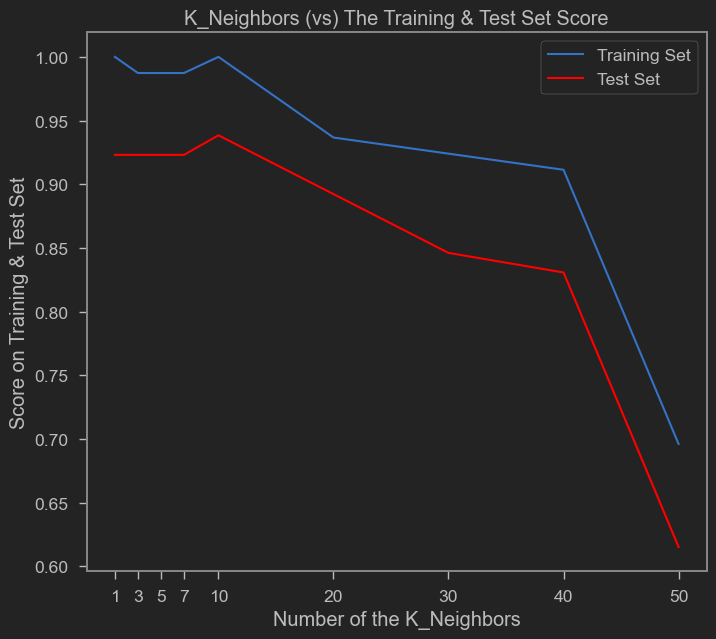

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.5 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.93
Number of the Correct Predictions is :   67
Number of the Incorrect Predictions is :   5
Iteration Number Equal : 64 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.5 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.94
Number of the Correct Predictions is :   68
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 65 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.5 : 
 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.93
Number of t

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 20 .. and For The Test Size Equal 0.5 : 
 
Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.88
Number of the Correct Predictions is :   63
Number of the Incorrect Predictions is :   9
Iteration Number Equal : 69 
 
----------------------------------------------------------------------------------------------

For The K Equal 30 .. and For The Test Size Equal 0.5 : 
 
Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.85
Number of the Correct Predictions is :   61
Number of the Incorrect Predictions is :   11
Iteration Number Equal : 70 
 
----------------------------------------------------------------------------------------------

For The K Equal 40 .. and For The Test Size Equal 0.5 : 
 
Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.85
Number of the Correct Predictions is :   61
Number of the Incorrect Predictions is :   11
Iteration Nu

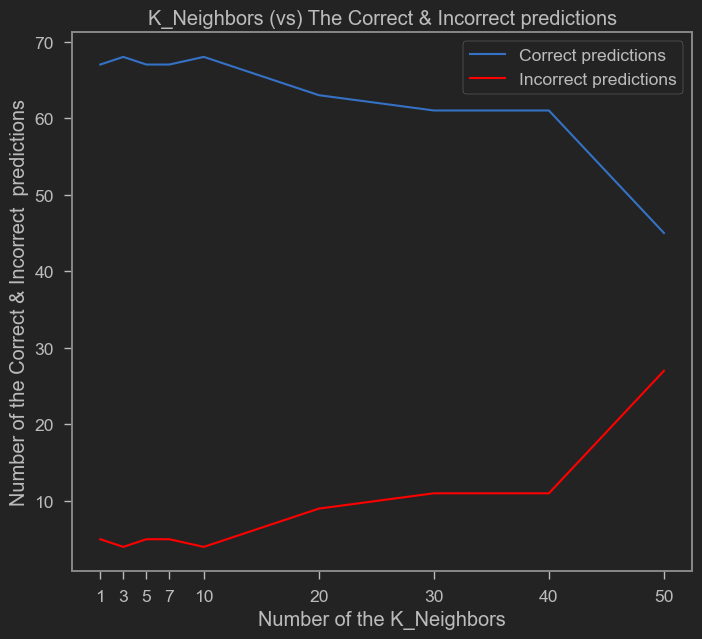

----------------------------------------------------------------------------------------------


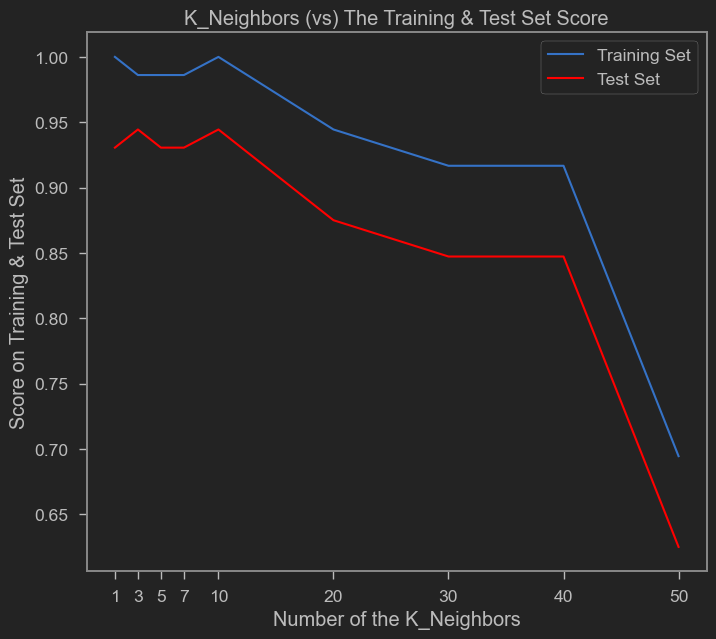

----------------------------------------------------------------------------------------------
For The K Equal 1 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.95
Number of the Correct Predictions is :   76
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 73 
 
----------------------------------------------------------------------------------------------

For The K Equal 3 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.94
Number of the Correct Predictions is :   75
Number of the Incorrect Predictions is :   5
Iteration Number Equal : 74 
 
----------------------------------------------------------------------------------------------

For The K Equal 5 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.94
Number o

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 7 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.94
Number of the Correct Predictions is :   75
Number of the Incorrect Predictions is :   5
Iteration Number Equal : 76 
 
----------------------------------------------------------------------------------------------

For The K Equal 10 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.95
Number of the Correct Predictions is :   76
Number of the Incorrect Predictions is :   4
Iteration Number Equal : 77 
 
----------------------------------------------------------------------------------------------

For The K Equal 20 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.88
Number of the Correct Predictions is :   70
Number of the Incorrect Predictions is :   10
Iteration N

C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

For The K Equal 50 .. and For The Test Size Equal 0.55 : 
 
Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.62
Number of the Correct Predictions is :   50
Number of the Incorrect Predictions is :   30
Iteration Number Equal : 81 
 
----------------------------------------------------------------------------------------------

The Average Number of Correct Predictions is :  68.33333333333333
**********************************************************************************************



C:\Users\esmae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


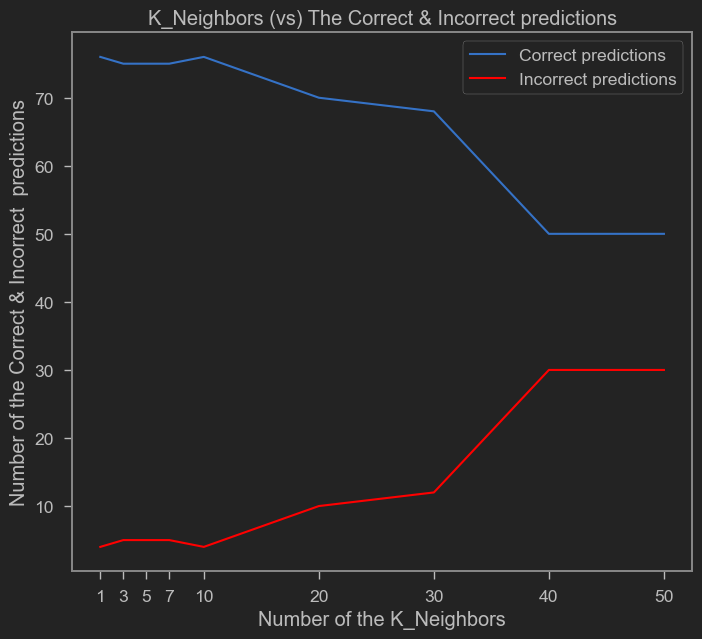

----------------------------------------------------------------------------------------------


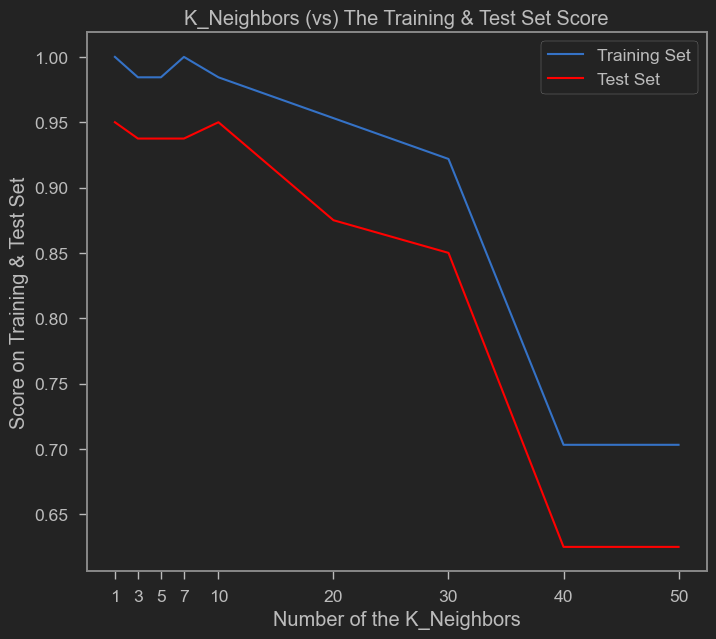

----------------------------------------------------------------------------------------------


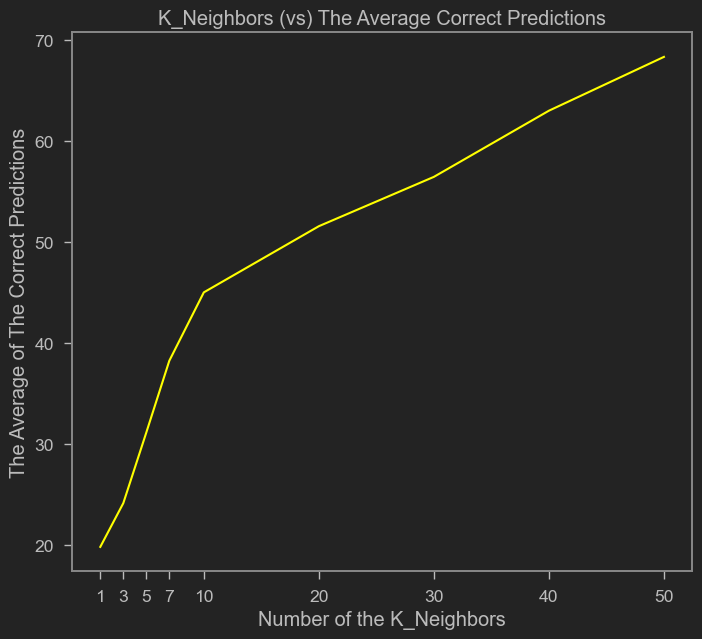

----------------------------------------------------------------------------------------------


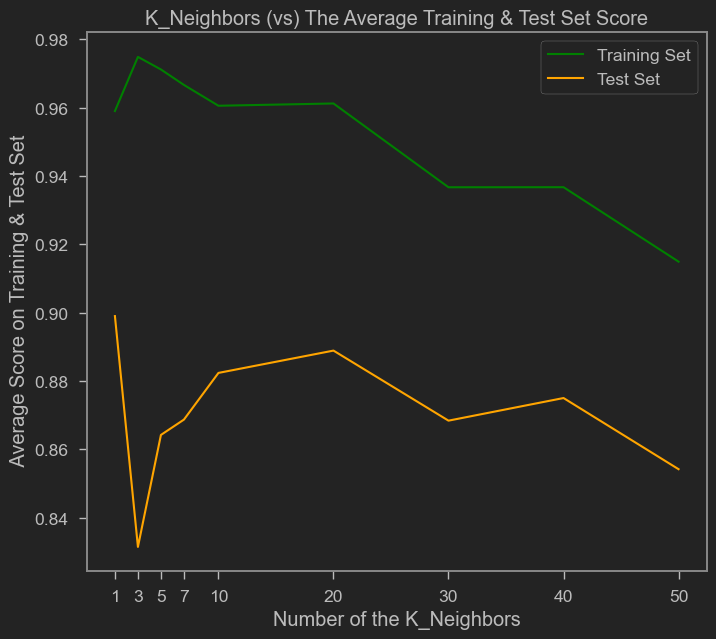

In [21]:
KNN_model(X,y)

# General Model Function 

In [22]:
def set_model(X,y,model) :
    correct_predictions_list , not_correct_predictions_list , score_for_train_list , score_for_test_list   = [] , [] , [] , []
    for test_size in test_list :
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 , test_size=test_size)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        logreg = model()
        logreg.fit(X_train, y_train)
        train_score = logreg.score(X_train, y_train)
        test_score = logreg.score(X_test, y_test)
        score_for_train_list.append(train_score)
        score_for_test_list.append(test_score)
        print(f"For The {logreg}  Model and for The tset size Equal {test_size} : \n ")
        print(f'Accuracy of  {logreg} Model Classifier on training set: ' ,'{:.2f}'
             .format(train_score))
        print(f'Accuracy of {logreg} Model Classifier on test set: ', '{:.2f}'
             .format(test_score))
        prediction = logreg.predict(X_test) 
        comparing = (y_test == prediction)
        num_of_correct_predictions = comparing.sum()
        correct_predictions_list.append(num_of_correct_predictions)
        number_of_not_correct_predictions = len(comparing) - comparing.sum()
        not_correct_predictions_list.append(number_of_not_correct_predictions)
        print("Number of the Correct Predictions is :  ",num_of_correct_predictions )
        print("Number of the INcorrect Predictions is :  ",number_of_not_correct_predictions , "\n" )
        print("---------------------------------------------------------------------------------------------- \n")
    plt.plot(test_list , correct_predictions_list)
    plt.plot(test_list,not_correct_predictions_list , color = "red")
    plt.xlabel(logreg)
    plt.ylabel("Number of the Correct & Incorrect  predictions")
    plt.title("Test Size (vs) The Correct & Incorrect predictions")
    plt.legend(["Correct predictions","Incorrect predictions"])
    plt.xticks(test_list)
    plt.show()
    print("----------------------------------------------------------------------------------------------")
    plt.plot(test_list , score_for_train_list)
    plt.plot(test_list , score_for_test_list , color = "red")
    plt.xlabel(logreg)
    plt.ylabel("Score on Training & Test Set")
    plt.title("Test Size (vs) The Training & Test Set Score") 
    plt.legend(["Training Set","Test Set"])
    plt.xticks(test_list)
    plt.show()
    print("----------------------------------------------------------------------------------------------") 
    print("The correct predictions average for k is :  " , correct_predictions_list)

# LOGISTIC REGRESSION

For The LogisticRegression()  Model and for The tset size Equal 0.15 : 
 
Accuracy of  LogisticRegression() Model Classifier on training set:  0.94
Accuracy of LogisticRegression() Model Classifier on test set:  0.82
Number of the Correct Predictions is :   18
Number of the INcorrect Predictions is :   4 

---------------------------------------------------------------------------------------------- 

For The LogisticRegression()  Model and for The tset size Equal 0.2 : 
 
Accuracy of  LogisticRegression() Model Classifier on training set:  0.94
Accuracy of LogisticRegression() Model Classifier on test set:  0.69
Number of the Correct Predictions is :   20
Number of the INcorrect Predictions is :   9 

---------------------------------------------------------------------------------------------- 

For The LogisticRegression()  Model and for The tset size Equal 0.25 : 
 
Accuracy of  LogisticRegression() Model Classifier on training set:  0.93
Accuracy of LogisticRegression() Model Clas

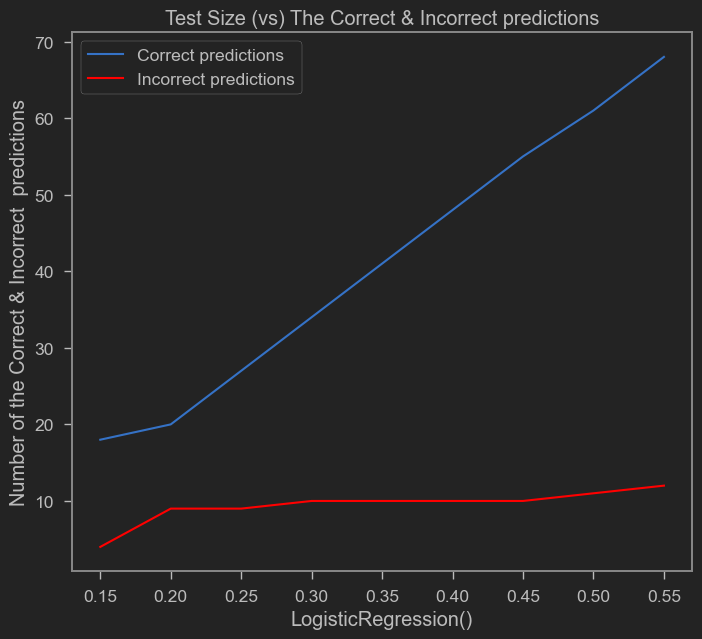

----------------------------------------------------------------------------------------------


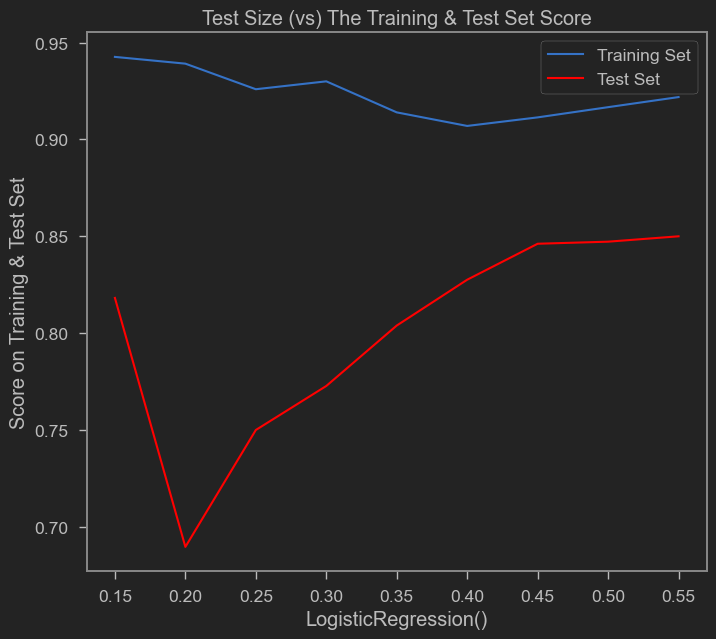

----------------------------------------------------------------------------------------------
The correct predictions average for k is :   [18, 20, 27, 34, 41, 48, 55, 61, 68]


In [23]:
set_model(X,y,LogisticRegression)

# DECISION TREE CLASSIFIER

For The DecisionTreeClassifier()  Model and for The tset size Equal 0.15 : 
 
Accuracy of  DecisionTreeClassifier() Model Classifier on training set:  1.00
Accuracy of DecisionTreeClassifier() Model Classifier on test set:  0.95
Number of the Correct Predictions is :   21
Number of the INcorrect Predictions is :   1 

---------------------------------------------------------------------------------------------- 

For The DecisionTreeClassifier()  Model and for The tset size Equal 0.2 : 
 
Accuracy of  DecisionTreeClassifier() Model Classifier on training set:  1.00
Accuracy of DecisionTreeClassifier() Model Classifier on test set:  0.86
Number of the Correct Predictions is :   25
Number of the INcorrect Predictions is :   4 

---------------------------------------------------------------------------------------------- 

For The DecisionTreeClassifier()  Model and for The tset size Equal 0.25 : 
 
Accuracy of  DecisionTreeClassifier() Model Classifier on training set:  1.00
Accuracy of

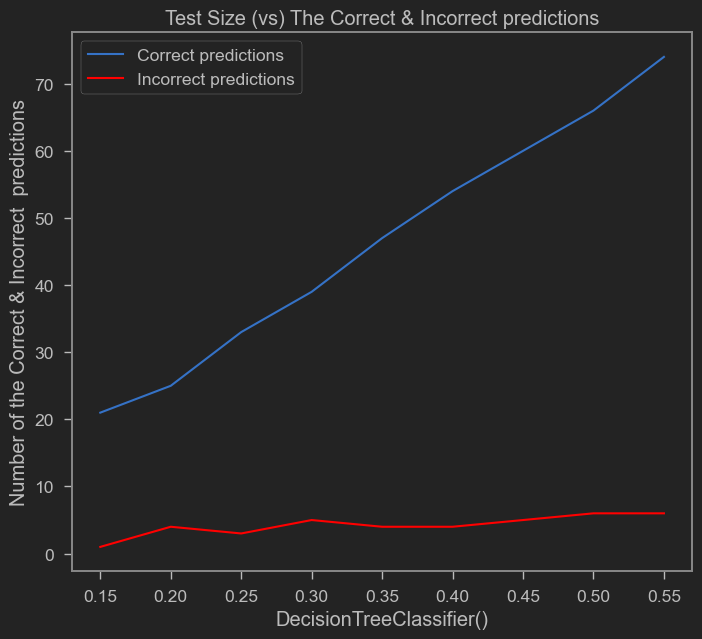

----------------------------------------------------------------------------------------------


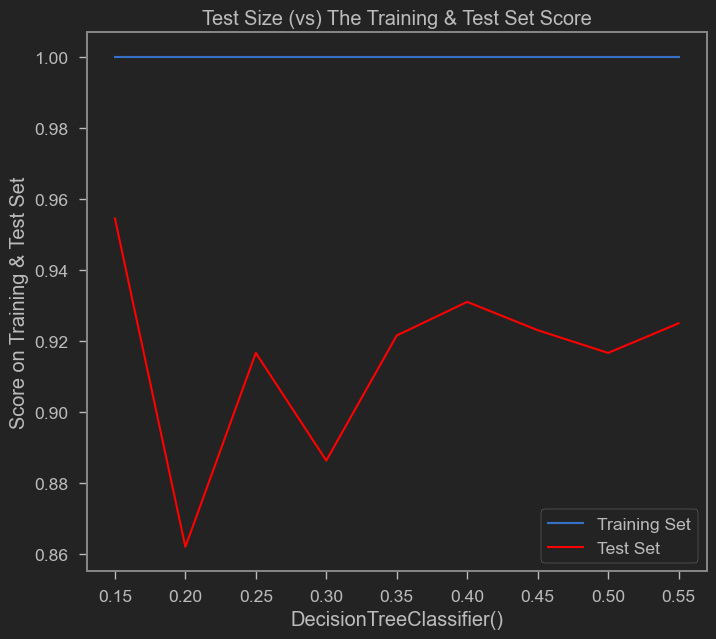

----------------------------------------------------------------------------------------------
The correct predictions average for k is :   [21, 25, 33, 39, 47, 54, 60, 66, 74]


In [24]:
set_model(X,y,DecisionTreeClassifier)

# SVC

For The SVC()  Model and for The tset size Equal 0.15 : 
 
Accuracy of  SVC() Model Classifier on training set:  0.97
Accuracy of SVC() Model Classifier on test set:  0.91
Number of the Correct Predictions is :   20
Number of the INcorrect Predictions is :   2 

---------------------------------------------------------------------------------------------- 

For The SVC()  Model and for The tset size Equal 0.2 : 
 
Accuracy of  SVC() Model Classifier on training set:  0.98
Accuracy of SVC() Model Classifier on test set:  0.86
Number of the Correct Predictions is :   25
Number of the INcorrect Predictions is :   4 

---------------------------------------------------------------------------------------------- 

For The SVC()  Model and for The tset size Equal 0.25 : 
 
Accuracy of  SVC() Model Classifier on training set:  0.99
Accuracy of SVC() Model Classifier on test set:  0.89
Number of the Correct Predictions is :   32
Number of the INcorrect Predictions is :   4 

------------------

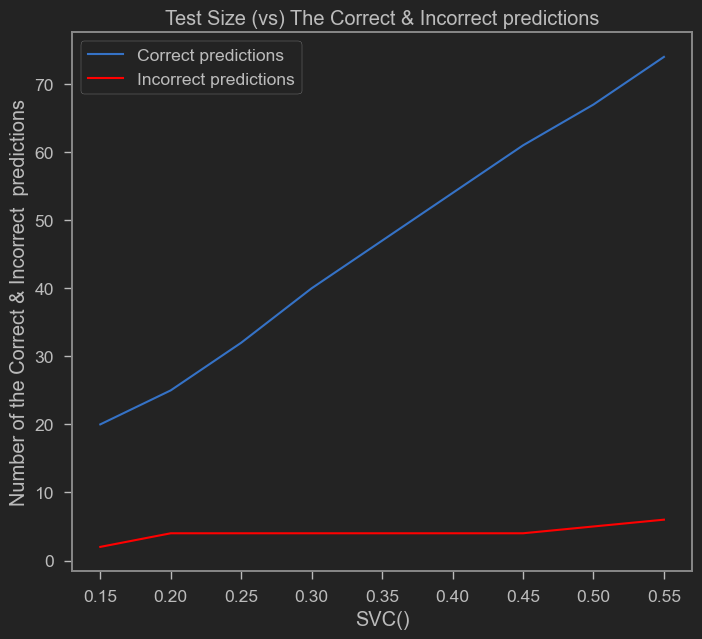

----------------------------------------------------------------------------------------------


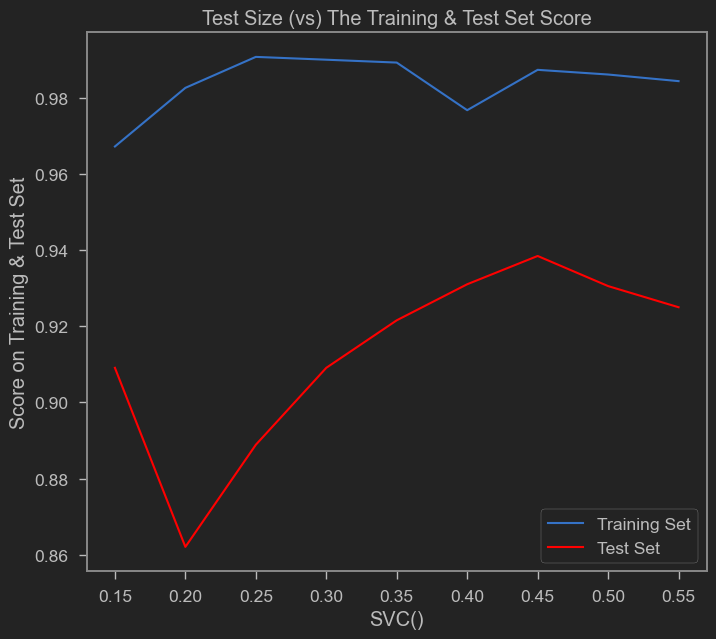

----------------------------------------------------------------------------------------------
The correct predictions average for k is :   [20, 25, 32, 40, 47, 54, 61, 67, 74]


In [25]:
set_model(X,y,SVC)

# Gaussian NB

For The GaussianNB()  Model and for The tset size Equal 0.15 : 
 
Accuracy of  GaussianNB() Model Classifier on training set:  0.96
Accuracy of GaussianNB() Model Classifier on test set:  0.91
Number of the Correct Predictions is :   20
Number of the INcorrect Predictions is :   2 

---------------------------------------------------------------------------------------------- 

For The GaussianNB()  Model and for The tset size Equal 0.2 : 
 
Accuracy of  GaussianNB() Model Classifier on training set:  0.98
Accuracy of GaussianNB() Model Classifier on test set:  0.86
Number of the Correct Predictions is :   25
Number of the INcorrect Predictions is :   4 

---------------------------------------------------------------------------------------------- 

For The GaussianNB()  Model and for The tset size Equal 0.25 : 
 
Accuracy of  GaussianNB() Model Classifier on training set:  0.97
Accuracy of GaussianNB() Model Classifier on test set:  0.89
Number of the Correct Predictions is :   32
Nu

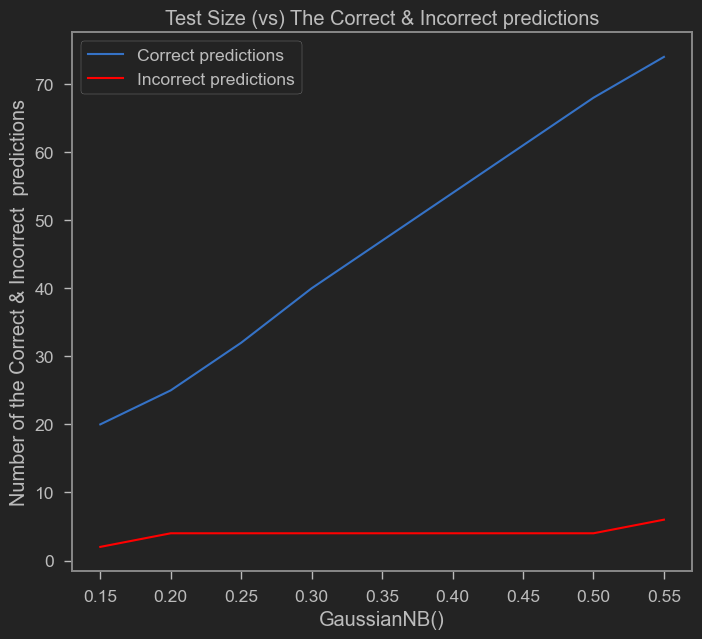

----------------------------------------------------------------------------------------------


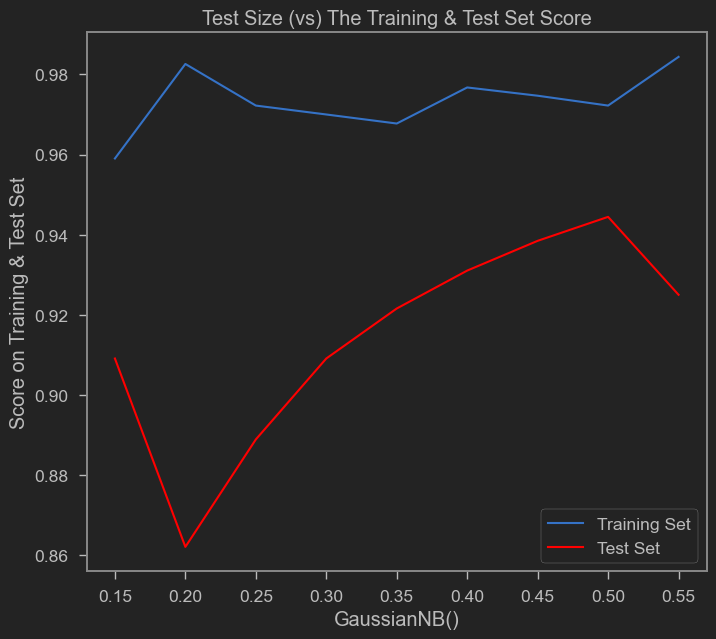

----------------------------------------------------------------------------------------------
The correct predictions average for k is :   [20, 25, 32, 40, 47, 54, 61, 68, 74]


In [26]:
set_model(X,y,GaussianNB)